<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/MineracaoDados/blob/main/VisualizacaoDadosTrilha4_BrunaMatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# ***T4 – Atividade de Aprofundamento***
---

Explorar o dataset da Netflix

In [69]:
# Import de algumas bibliotecas normalmente utilizadas na explocação dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Análise Exploratória de Dados

Vamos trabalhar, primeiramente com a Análise Exploratória de Dados, conhecendo dataset, número de exemplares e tipos de dados. Registre os resultados no Colab/Notebook. Utilize também uma visualização que julgue aderente a esta análise, como as que vimos na trilha 3, sobre análise exploratória.

Em seguida, vamos desenvolver uma visualização de série temporal para finalizar a atividade..

In [76]:
# Lendo a tabela

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [77]:
# Inicialmente vamos analisar todas as colunas
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [78]:
# Foi possível observar que as colunas director,cast,country,date_added,rating e duration	possuem valores nulos
# que vamos precisar tratar
# Vaos calcular a percentagem de valores nulos
# vamos então tentar encontrar a quantidade de valores nulos 
(df.isnull().sum() / len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [80]:
# São muitos valores para que simplismente remover. Logo teremos que mexer com a base de dados para incluir valores nesses casos
# Poderíamos adicionar dados usando a probabilidade ou randomicamente, mas como as colunas com informações nulas são de variáveis categóricas, 

df = df.dropna(subset=['director','cast','country','date_added','rating','duration'],how='any')
df['director'] = df['director'].fillna(value='Not Found')
# Poderiamos colocar Not Found para esses casos
#df['cast'] = df['cast'].fillna(value='Not Found')
#df['country'] = df['country'].fillna(value='Not Found')
#df['rating'] = df['rating'].fillna(value='Not Found')
#df['duration'] = df['duration'].fillna(value='Not Found')
# mas vamos remover para simplificar a análise

print((df.isnull().sum() / len(df))*100)
df.describe(include='all')

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7290,7290,7290,7290,7290,7290,7290,7290.000000,7290,7290,7290,7290
unique,7290,2,7290,3946,7092,689,1673,NaN,14,206,489,7277
top,s2,Movie,Blood & Water,Not Found,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies",Mistakenly accused of an attack on the Fourth ...
freq,1,5277,1,1958,19,2479,101,NaN,2657,1252,337,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.698903,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.862822,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
# é possível analisar os valores de media e mediana para a coluna 'release_year'
# para as demias colunas que são categóricas, podemos observar as modas e os valores possíveis de cada uma delas

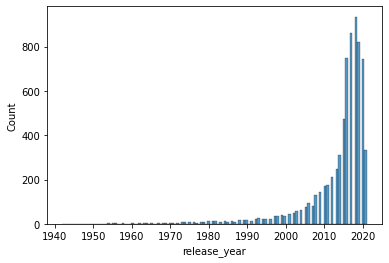

In [81]:
# Analisando os anos em que os conteúdos foram adicionados

sns.histplot(data=df,x="release_year")

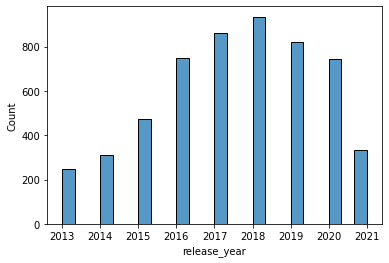

In [82]:
# percebemos alguns outliers 
# Neste caso, seria melhor se alterassemos os dados para considerar os que estão disponíveis do primeiro quartil para frente, 
# já que esses muito antigos não são muito relevantes ara a nossa análise
df_filtered_new = df[df['release_year'] >= df['release_year'].quantile(0.25)] 
sns.histplot(data=df_filtered_new,x="release_year")

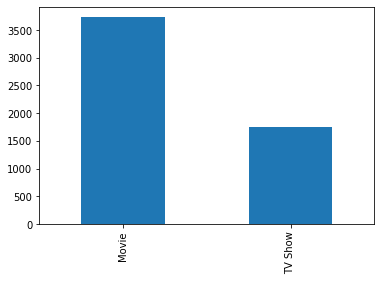

In [83]:
# pudemos observar que o pico de adição de conteúdo foi em 2018
# podemos também analisar se esses conteúdos eram Filves ou não
df_filtered_new.type.value_counts().plot(kind="bar")
plt.show()

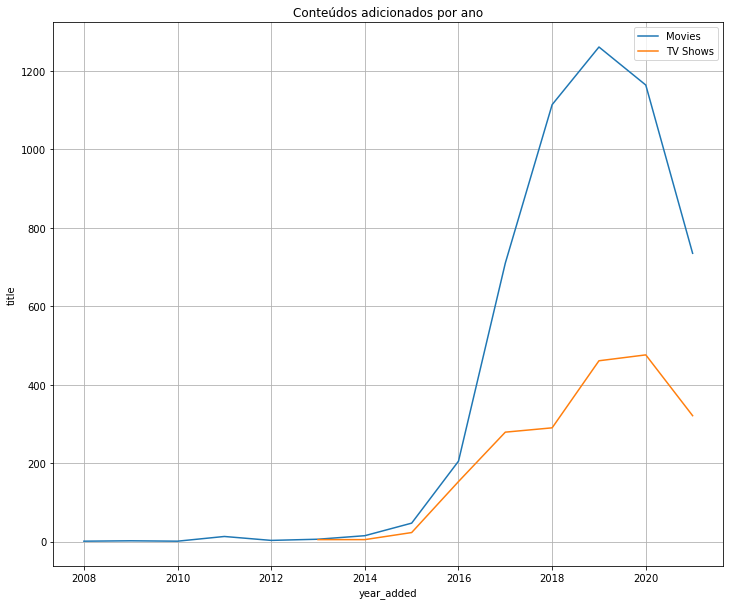

In [93]:
# assim, pudemos perceber que filmes foram adicionados em sua grande maioria.
# Vamos analisar o ano que foram adicionados
# Para isso precisamos splitar a informação disponível na coluna 'date_added'
df_shows = (df.loc[df["type"]=="TV Show"]).reset_index(drop=True)
df_movies = (df.loc[df["type"]=="Movie"]).reset_index(drop=True)

# Para fazermos uma análise considerando o ano que cada conteúdo foi adicionado, precisamos
# manipular a informação disponível na coluna date_added
# transformamos para o tipo datetime
df["date_added"] = pd.to_datetime(df["date_added"])

# Adicionamos ao nosso dataframe as colunas com as informações de mes e ano
df["year_added"] = df["date_added"].dt.year
df["year_added"] = df["year_added"].fillna(0)
df["year_added"] = df["year_added"].astype(int)
df["month_added"] = df["date_added"].dt.month_name()

# Agrupando os dados por ano adicionado
df_movies_added_year = df_movies.groupby(by="year_added")["title"].nunique()
df_shows_added_year = df_shows.groupby(by="year_added")["title"].nunique()
# Plotar a iformação do ano adicionado no decorrer do tempo para comparar quantos filmes e 
# TV_shows foram adicionados

plt.figure(figsize=(12,10))
sns.lineplot(data=df_movies_added_year, x = df_movies_added_year.index, y = df_movies_added_year, label="Movies")
sns.lineplot(data=df_shows_added_year, x = df_shows_added_year.index, y=df_shows_added_year, label="TV Shows")
plt.grid()
plt.legend()
plt.title("Conteúdos adicionados por ano")
plt.show()

In [ ]:
# 